# OCE2901 Data Processor
By: Braidan Duffy \
Date created: 2023/02/07 \
Last Revision: 2023/02/07 

Version: 0.1.0

## Changelog
- Version 0.1.0: Initial version 

## Section 0: Imports and Constants

In [24]:
import csv
from dataclasses import dataclass
import util.data_util as du
import importlib
importlib.reload(du)

from tabulate import tabulate

HOBO_nearshore = du.HOBOSensor("", "HOBO Nearshore", "FieldDeployment_041621_Nearshore.csv")
HOBO_farshore = du.HOBOSensor("", "HOBO Farshore", "FieldDeployment_041621_Farshore.csv")
Lowell_1 = du.LowellSensor("2103022", "Lowell - Surfer 1", "2103022_SEA_4_16_21_1_(0)_AccelMag.csv")
Lowell_2 = du.LowellSensor("2103023", "Lowell - Surfer 2", "2103023_SEA_4_16_21_2_(0)_AccelMag.csv")
Thetis_1 = du.ThetisSensor("Thetis-003", "Thetis - Surfer 1", "thetis_001_raw_data.csv")

HOBOs = [HOBO_nearshore, HOBO_farshore]
sensors = [HOBO_nearshore, HOBO_farshore, Lowell_1, Lowell_2, Thetis_1]

## Section 1: Import Data
On any given deployment, we can expect to collect data time series from three different sources: a HOBO pressure gauge, a Lowell MAT-1 datalogger, and a Thetis instrumentation package.
Each of these sensors stores its data locally in a binary format that needs to be converted to a CSV.
This is typically done with executables packaged with each individual sensor and this step is therefore out of the scope if this script.
So, we can start by importing the CSV data files (located in "data") to memory.

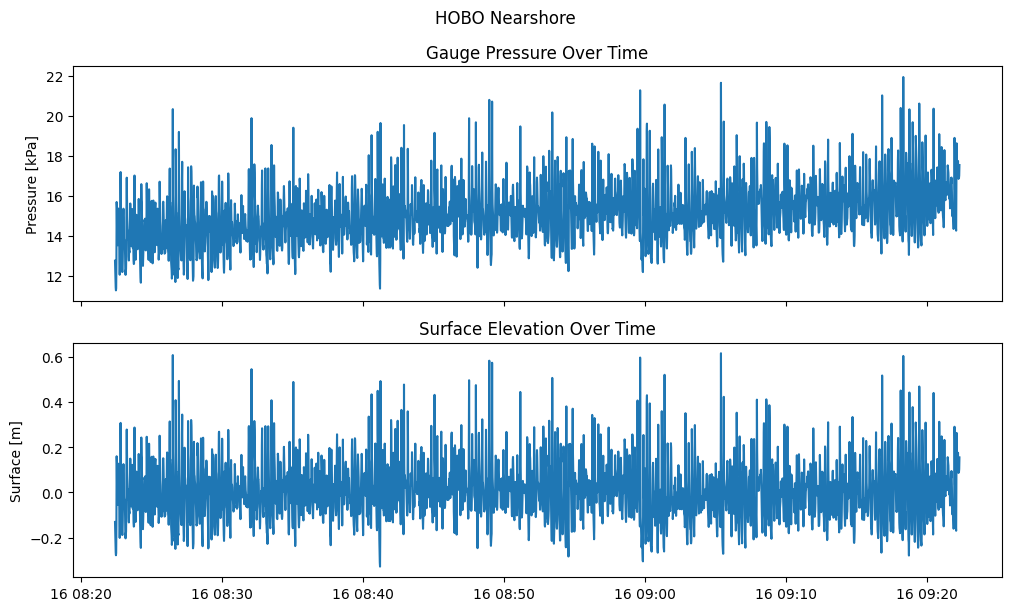

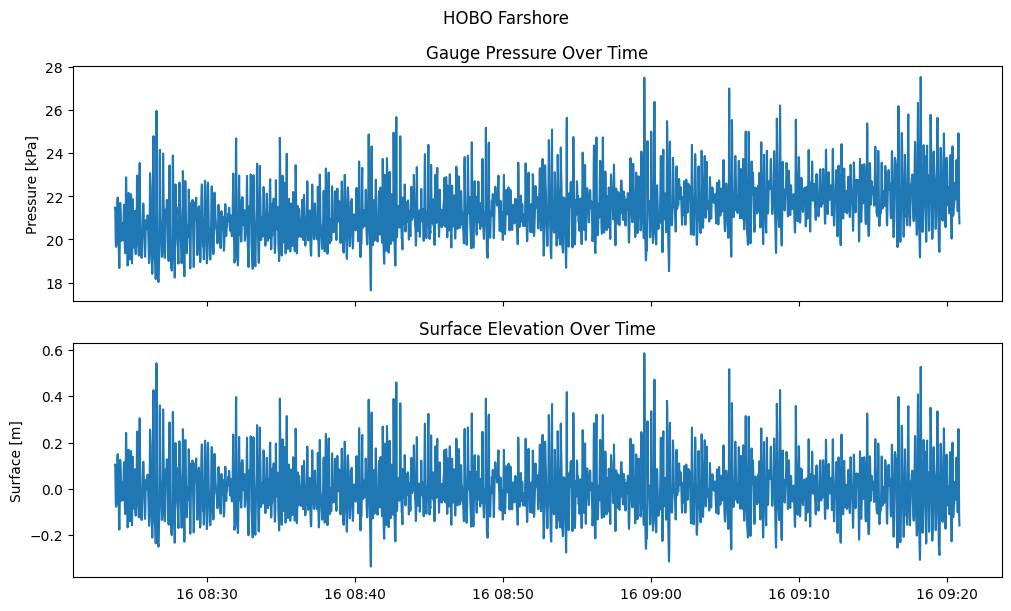

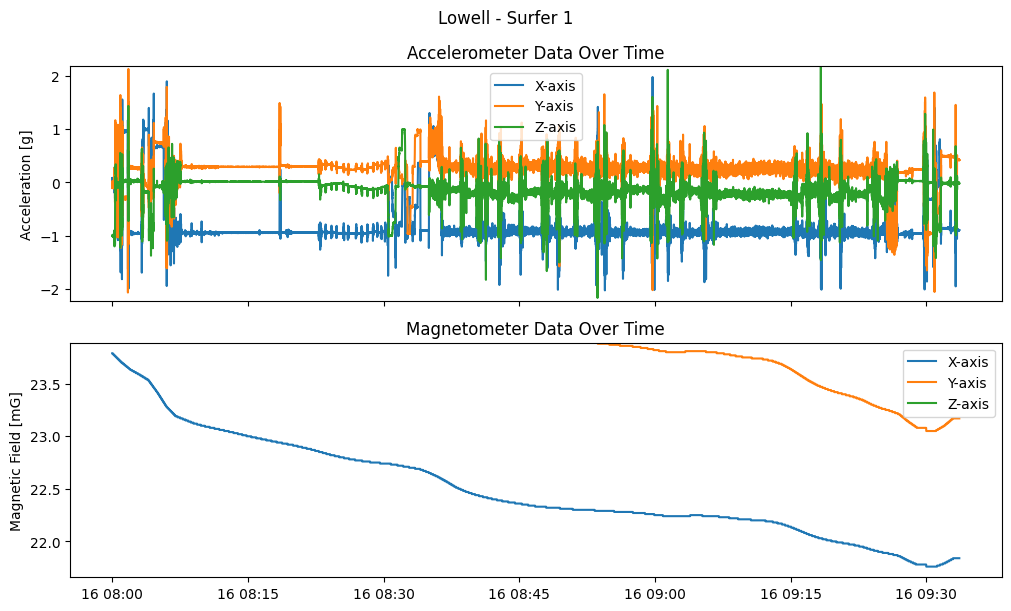

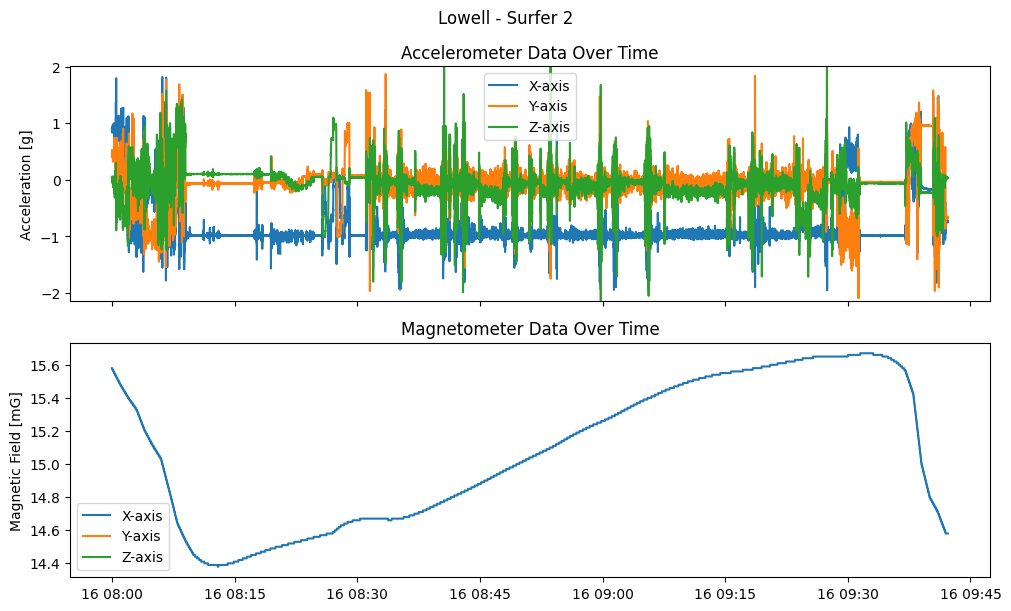

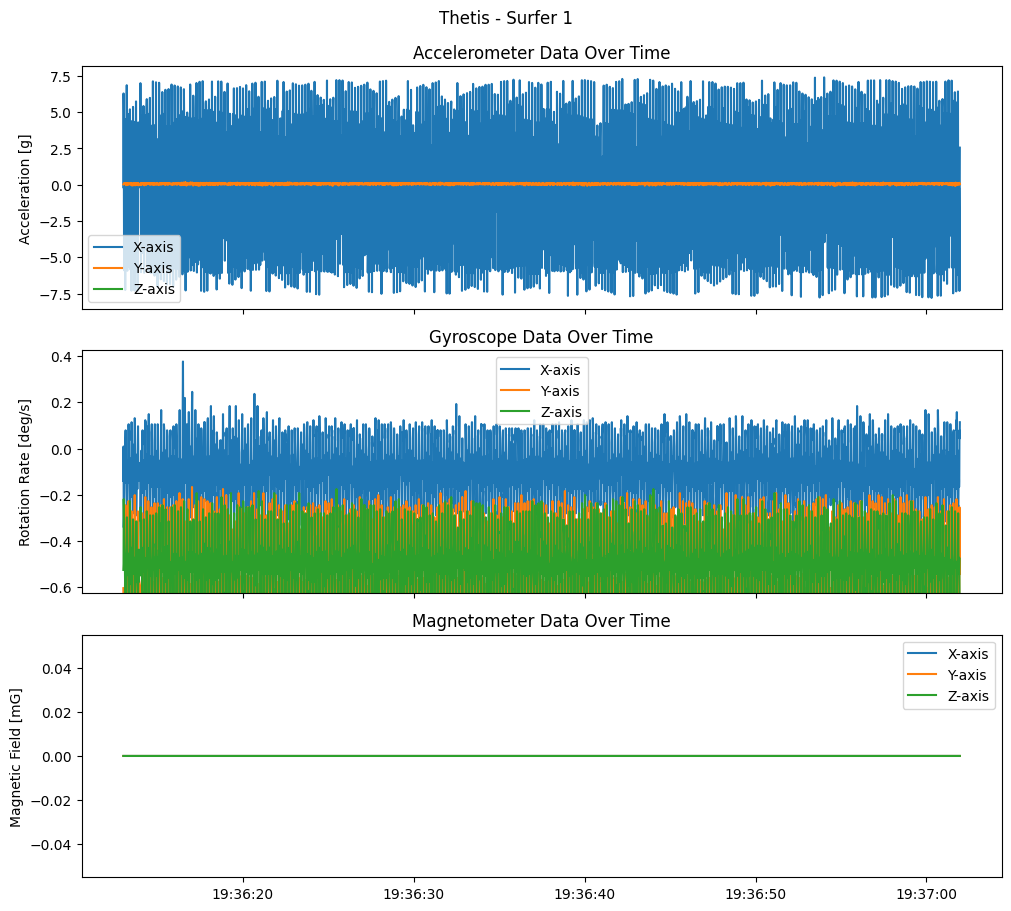

In [25]:
HOBO_nearshore.import_data()
HOBO_farshore.import_data()
Lowell_1.import_data()
Lowell_2.import_data()
Thetis_1.import_imu_data("thetis_001_imu_data.csv")

# Sanity Check Plots
for sensor in sensors:
    sensor.plot_all_data()

## Section 2: Process Pressure Data
Now that we have all of the data imported, we can begin processing the pressure data to get the sea state.
First, we will convert the pressure time series to a surface elevation over time (hint: this was done automagically when we imported the data).
Then, we will perform a wave-by-wave analysis of the the data to extract discrete waves and run basic statistics.
After that, we can perform a wave spectra analysis and compare the results.

╒══════════╤══════════╤══════════╤═════════╤═════════╤═════════╕
│    H_avg │      H_s │    H_rms │   T_avg │     T_s │   T_rms │
╞══════════╪══════════╪══════════╪═════════╪═════════╪═════════╡
│ 0.330668 │ 0.465867 │ 0.373587 │ 10.3295 │ 12.9477 │ 10.8957 │
├──────────┼──────────┼──────────┼─────────┼─────────┼─────────┤
│ 0.310946 │ 0.43945  │ 0.352323 │ 10.2979 │ 12.8521 │ 10.8153 │
╘══════════╧══════════╧══════════╧═════════╧═════════╧═════════╛


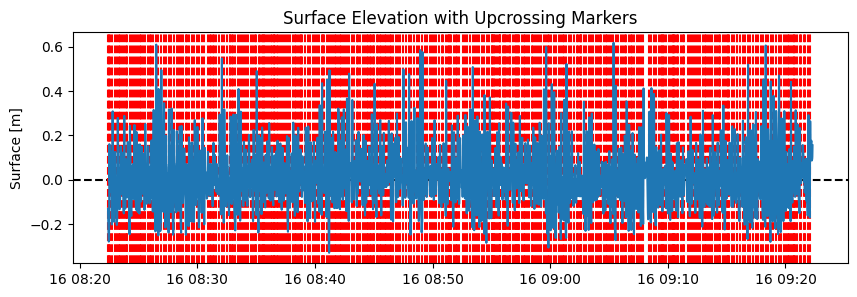

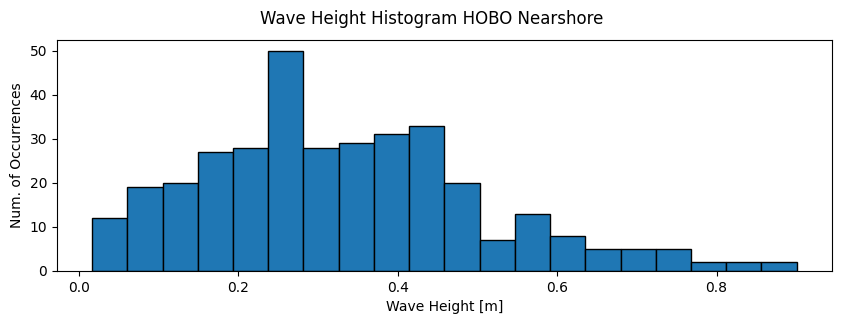

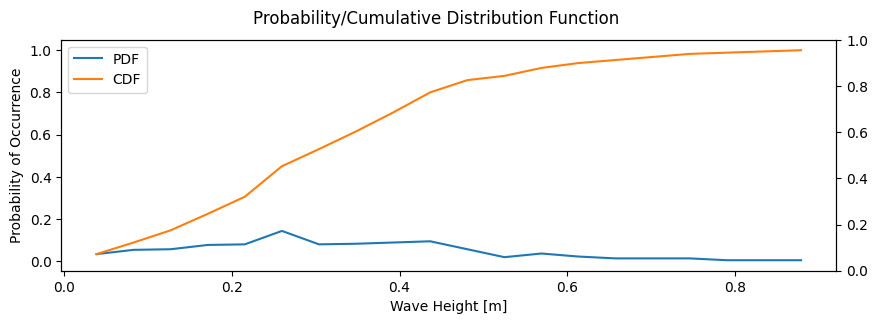

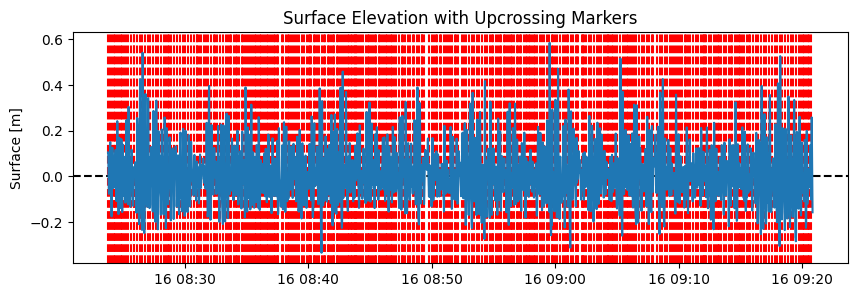

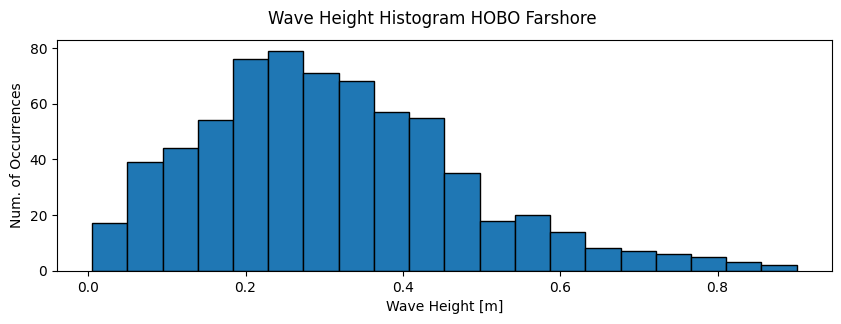

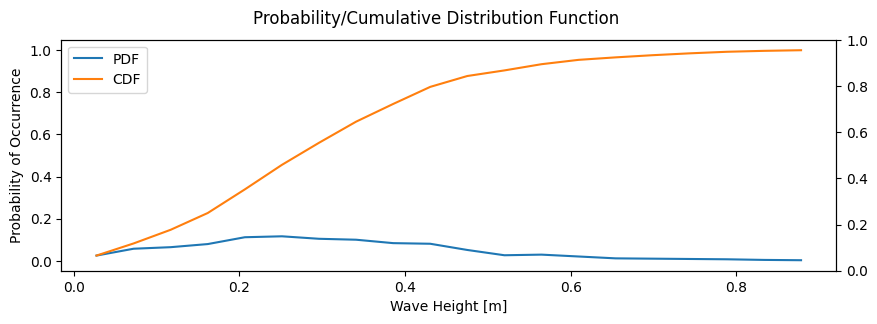

In [26]:
output_table = [["H_avg", "H_s", "H_rms", "T_avg", "T_s", "T_rms"]]

for HOBO in HOBOs:
    output_table.append(HOBO.wave_by_wave())
    HOBO.plot_wave_by_wave()
    HOBO.plot_histogram()
    HOBO.plot_pdfcdf()

# print(output_table)
print(tabulate(output_table, headers='firstrow', tablefmt='fancy_grid'))
